In [2]:
#Import required libraries
import numpy as np # linear algebra
import pandas as pad # data processing, CSV file I/O
import os
from sklearn.preprocessing import LabelEncoder

In [9]:
#Read dataset into pandas dataframe.
data=pd.read_csv('Iris.csv')
data.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Display the datatype of each column
data.dtypes
le=LabelEncoder()
# Create a column cat_code which represents the numerical values for Species column.
data['cat_code']=data.Species.astype('category').cat.codes 
# data['Species']=le.fit_transform(data['Species'])
data.head(100) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cat_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,1
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,1
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,1
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,1


In [16]:
data.columns
#Select the input features as x
x=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
 'PetalWidthCm']]
#Select the target
y=data['cat_code'] 

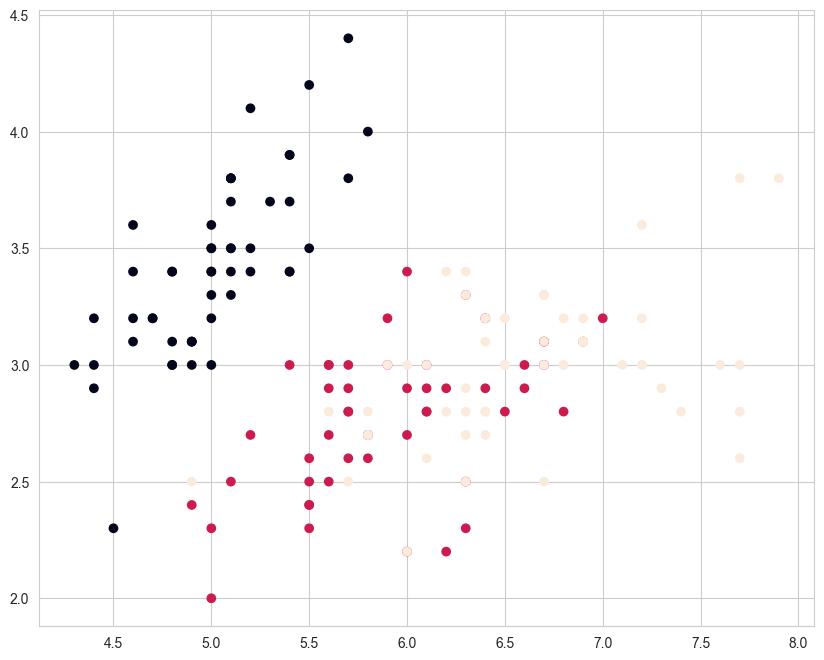

In [18]:
# Visualize the 3 categories of iris flower with respective to Sepal Length and Sepal Width

import matplotlib.pyplot as plt
plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=y)

((150, 4), (150,))

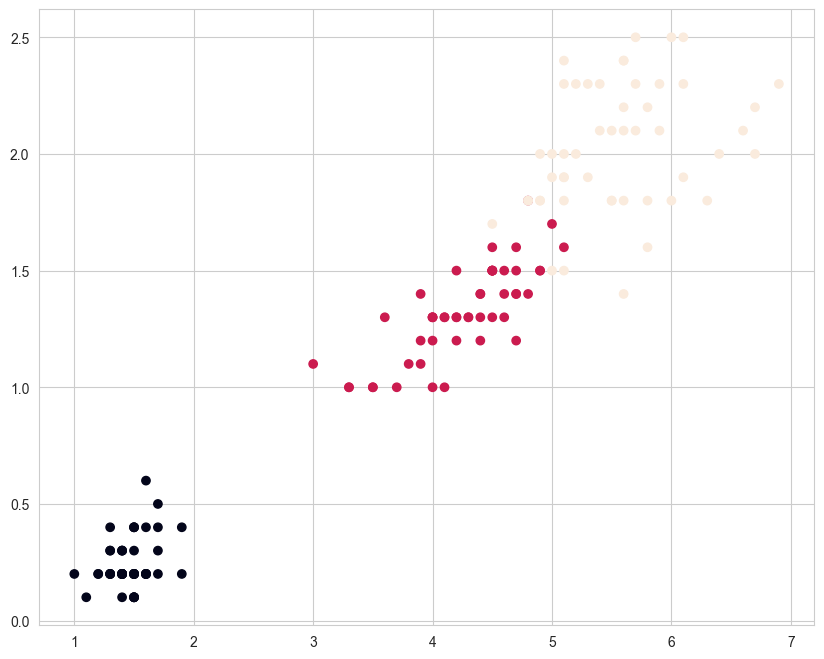

In [20]:
# Visualize the 3 categories of iris flower with respective to Petal Length and Petal Width
plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=y)
x.shape,y.shape

In [21]:
# Splitting train and test datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
# Fit the logistic regression model with SKlearn library
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(x_train,y_train) 

LogisticRegression()

In [22]:
# Prediction for train set
y_pred = lm.predict(x_train)
y_train.values
y_pred 

array([1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 0,
       2, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1, 0,
       2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2,
       0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 2], dtype=int8)

In [23]:
# Accuracy for train dataset
from sklearn.metrics import accuracy_score
# Prediction for test dataset and Accuracy
y_pred = lm.predict(x_test)
accuracy_score(y_test,y_pred) 

1.0